In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### INGESTION ET INSPECTION DES DONNEES

In [2]:
import pandas as pd

# CHARGEMENT
file_path = '/content/drive/MyDrive/TIME_SERIE_PROJECT/time_series_30min_singleindex.csv'
df = pd.read_csv(file_path)

display(df.head())

,utc_timestamp,cet_cest_timestamp,CY_load_actual_entsoe_transparency,CY_load_forecast_entsoe_transparency,CY_wind_onshore_generation_actual,GB_GBN_load_actual_entsoe_transparency,GB_GBN_load_forecast_entsoe_transparency,GB_GBN_solar_capacity,GB_GBN_solar_generation_actual,GB_GBN_solar_profile,...,GB_UKM_wind_offshore_generation_actual,GB_UKM_wind_onshore_capacity,GB_UKM_wind_onshore_generation_actual,IE_load_actual_entsoe_transparency,IE_load_forecast_entsoe_transparency,IE_wind_onshore_generation_actual,IE_sem_load_actual_entsoe_transparency,IE_sem_load_forecast_entsoe_transparency,IE_sem_price_day_ahead,IE_sem_wind_onshore_generation_actual
0,2014-12-31T23:00:00Z,2015-01-01T00:00:00+0100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2014-12-31T23:30:00Z,2015-01-01T00:30:00+0100,NaN,NaN,NaN,NaN,NaN,2664.0,NaN,NaN,...,NaN,8173.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2015-01-01T00:00:00Z,2015-01-01T01:00:00+0100,NaN,NaN,NaN,NaN,NaN,2669.0,NaN,NaN,...,NaN,8174.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2015-01-01T00:30:00Z,2015-01-01T01:30:00+0100,NaN,NaN,NaN,26758.0,32057.0,2669.0,NaN,NaN,...,NaN,8174.0,385.33,2832.37,3550.0,1335.88,3681.37,NaN,NaN,1721.21
4,2015-01-01T01:00:00Z,2015-01-01T02:00:00+0100,NaN,NaN,NaN,27561.0,32135.0,2669.0,NaN,NaN,...,NaN,8174.0,1050.04,2726.20,3403.0,1289.69,3523.20,NaN,NaN,1675.24


In [3]:
# selection des colonnes utiles pour la serie
df.columns

Index(['utc_timestamp', 'cet_cest_timestamp',
       'CY_load_actual_entsoe_transparency',
       'CY_load_forecast_entsoe_transparency',
       'CY_wind_onshore_generation_actual',
       'GB_GBN_load_actual_entsoe_transparency',
       'GB_GBN_load_forecast_entsoe_transparency', 'GB_GBN_solar_capacity',
       'GB_GBN_solar_generation_actual', 'GB_GBN_solar_profile',
       'GB_GBN_wind_capacity', 'GB_GBN_wind_generation_actual',
       'GB_GBN_wind_profile', 'GB_GBN_wind_offshore_capacity',
       'GB_GBN_wind_offshore_generation_actual',
       'GB_GBN_wind_offshore_profile', 'GB_GBN_wind_onshore_capacity',
       'GB_GBN_wind_onshore_generation_actual', 'GB_GBN_wind_onshore_profile',
       'GB_NIR_load_actual_entsoe_transparency',
       'GB_NIR_load_forecast_entsoe_transparency', 'GB_NIR_solar_capacity',
       'GB_NIR_wind_onshore_capacity', 'GB_NIR_wind_onshore_generation_actual',
       'GB_UKM_load_actual_entsoe_transparency',
       'GB_UKM_load_forecast_entsoe_transparency

In [4]:
used_colonne = ['utc_timestamp','GB_UKM_load_actual_entsoe_transparency']

# Serie temporelle pour l'angleterre
UKM_df = df[used_colonne]

#### INSPECTION

In [5]:
# type
UKM_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100802 entries, 0 to 100801
Data columns (total 2 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   utc_timestamp                           100802 non-null  object 
 1   GB_UKM_load_actual_entsoe_transparency  100448 non-null  float64
dtypes: float64(1), object(1)
memory usage: 1.5+ MB


In [6]:
# fréquence réelle observée et période couverte
print('peride couverte: de', UKM_df.utc_timestamp.min(), 'à', UKM_df.utc_timestamp.max())
#UKM_df.utc_timestamp.iloc[-1]

peride couverte: de 2014-12-31T23:00:00Z à 2020-09-30T23:30:00Z


In [7]:
# valeurs manquantes
UKM_df.isna().sum()

# 354 valeurs manquantes dans la colonne load_actual

,0
utc_timestamp,0
GB_UKM_load_actual_entsoe_transparency,354


In [8]:
# duplication temporelles
UKM_df.duplicated().sum()

# aucun doublon

np.int64(0)

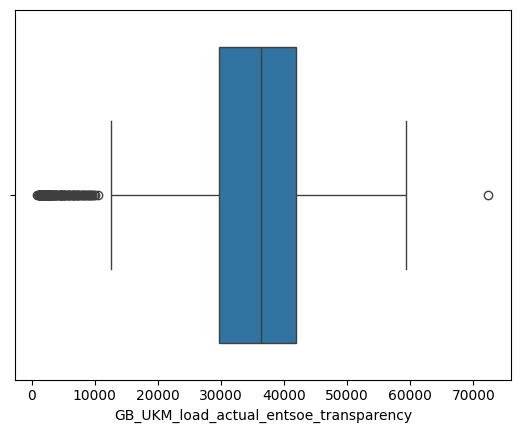

In [9]:
# valeurs abbérantes
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(x=UKM_df.GB_UKM_load_actual_entsoe_transparency)
plt.show()

In [10]:
# ressortir les outliers
import numpy as np
def outliers(df, col):
    Q1 = np.quantile(df[col], 0.25)
    Q3 = np.quantile(df[col], 0.75)
    iqr = Q3 - Q1
    lower_bound = Q1 - 1.5 * iqr
    upper_bound = Q3 + 1.5 * iqr
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    return outliers

outliers_df = outliers(UKM_df, 'GB_UKM_load_actual_entsoe_transparency')

In [11]:
outliers_df.head()

,utc_timestamp,GB_UKM_load_actual_entsoe_transparency


Structure temporelle :
- type timestamp : Object
- fréquence observée : chaque 30 minutes
- période couverte :peride couverte: de 2014-12-31T23:00:00Z à 2020-09-30T23:30:00Z


Qualité des données :
- valeurs manquantes :# 354 valeurs manquantes dans la colonne lGB_UKM_load_actual_entsoe_transparency
- doublons : aucun
- anomalies évidentes : quelques outliers observees sur un boxpplot

Premiers risques identifiés :
* timestamp non typé (bloquant)

* changement d’heure saisonnier (DST)

* valeurs manquantes potentiellement consécutives

* non-stationnarité forte (attendue)

* agrégation horaire → journalier non triviale

* confusion possible entre pics normaux et anomalies


In [12]:
# changer le type de la colonne en date
#UKM_df['utc_timestamp'] = pd.to_datetime(UKM_df['utc_timestamp'])

In [13]:
# les valeurs manquantes dans la colonne GB_UKM_load_actual_entsoe_transparency sont-elles dispersées ou groupées ?
isna = UKM_df.GB_UKM_load_actual_entsoe_transparency.isna()
# extraire les True
isna_df = UKM_df[isna]


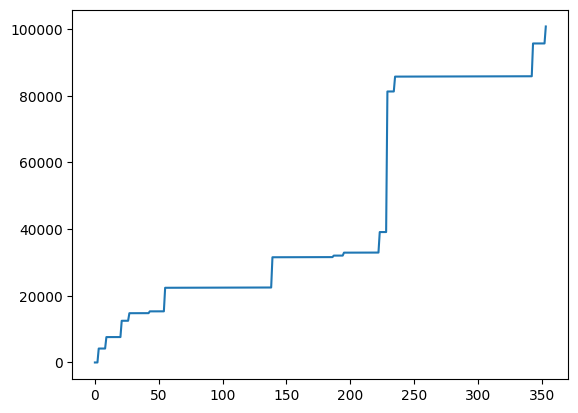

In [14]:
isna_df
# verifier si les numeros des lignes sont regroupés
plt.plot(isna_df.index)
# faire un graph avec les inde

#### ETAPE 3 : AGRÉGATION TEMPORELLE

In [15]:
# renomer la colonne en load
UKM_df.rename(columns={'GB_UKM_load_actual_entsoe_transparency': 'load'}, inplace=True)

/tmp/ipython-input-2133373005.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  UKM_df.rename(columns={'GB_UKM_load_actual_entsoe_transparency': 'load'}, inplace=True)


In [16]:
UKM_df.head()

,utc_timestamp,load
0,2014-12-31T23:00:00Z,NaN
1,2014-12-31T23:30:00Z,NaN
2,2015-01-01T00:00:00Z,NaN
3,2015-01-01T00:30:00Z,27607.0
4,2015-01-01T01:00:00Z,28358.0


In [17]:
# Mise en place de l'index
UKM_df['timestamp'] = pd.to_datetime(UKM_df['utc_timestamp'], utc=True)

UKM_df_temp = UKM_df.set_index('timestamp').sort_index()

/tmp/ipython-input-1410357117.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  UKM_df['timestamp'] = pd.to_datetime(UKM_df['utc_timestamp'], utc=True)


In [18]:
UKM_df_temp.columns

Index(['utc_timestamp', 'load'], dtype='object')

In [19]:
# Vérification stricte de la complétude journalière
daily_count = UKM_df_temp.resample('D').count()
daily_count

,utc_timestamp,load
timestamp,,
2014-12-31 00:00:00+00:00,2,0
2015-01-01 00:00:00+00:00,48,47
2015-01-02 00:00:00+00:00,48,48
2015-01-03 00:00:00+00:00,48,48
2015-01-04 00:00:00+00:00,48,48
...,...,...
2020-09-26 00:00:00+00:00,48,48
2020-09-27 00:00:00+00:00,48,48
2020-09-28 00:00:00+00:00,48,48


In [20]:
# Selection des journées complètes
complete_days = daily_count[daily_count == 48].index
UKM_df_complete = UKM_df_temp[UKM_df_temp.index.floor('D').isin(complete_days)]

In [21]:
# Aggregation jounalière
daily_energy = (
    UKM_df_complete
    .resample('D')
    .agg({'load': 'sum'})
)

In [22]:
# Aggregation mensuelle
monthly_energy = (
    daily_energy
    .resample('ME')
    .sum()
)

In [23]:
# Tests de cohérence

# Test 1 : aucune valeur negative
assert (daily_energy >= 0).all().all()

assert (monthly_energy >= 0).all().all()

In [24]:
# Test 2 — cohérence jour → mois
monthly_check = daily_energy.resample('M').sum()
assert monthly_check.equals(monthly_energy)


/tmp/ipython-input-2758479826.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_check = daily_energy.resample('M').sum()


In [25]:
monthly_energy

,load
timestamp,
2014-12-31 00:00:00+00:00,0.0
2015-01-31 00:00:00+00:00,63369144.0
2015-02-28 00:00:00+00:00,59626390.0
2015-03-31 00:00:00+00:00,61449546.0
2015-04-30 00:00:00+00:00,52446414.0
...,...
2020-05-31 00:00:00+00:00,42267897.5
2020-06-30 00:00:00+00:00,39739675.0
2020-07-31 00:00:00+00:00,40725069.0


### EXPLORATION DES DONNEES

In [26]:
# description générale
daily_energy.min()

# load de 0 suspect

,0
load,0.0


In [27]:
daily_energy['day'] = daily_energy.index.day_name()

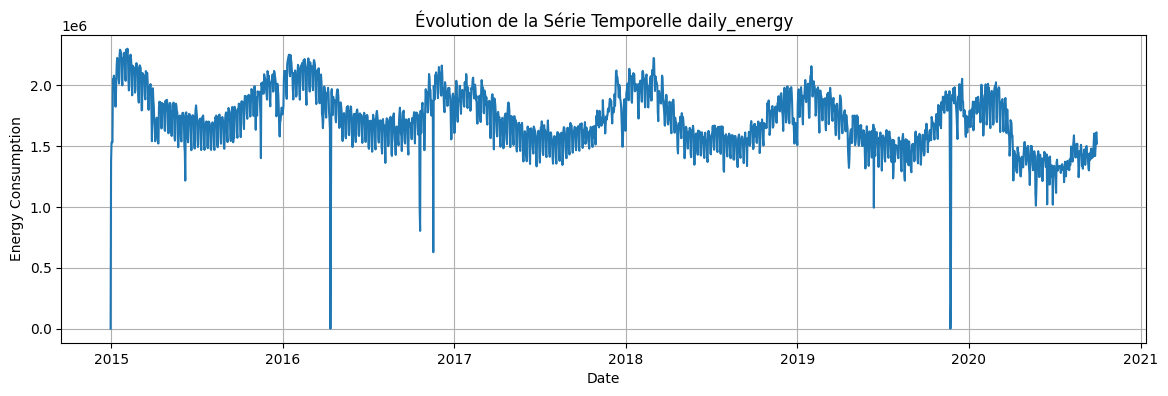

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
# visualiser par jours
plt.figure(figsize=(14, 4))
#sns.lineplot(data=daily_energy, x= 'day', y='load')
plt.plot(daily_energy['load'])
plt.grid(True)
plt.xlabel("Date")
plt.ylabel("Energy Consumption")
plt.title("Évolution de la Série Temporelle daily_energy")
plt.show()

In [29]:
# tendance globale plate ou constante
# bruit homogène
# zone stable avec de haut pics décroissant

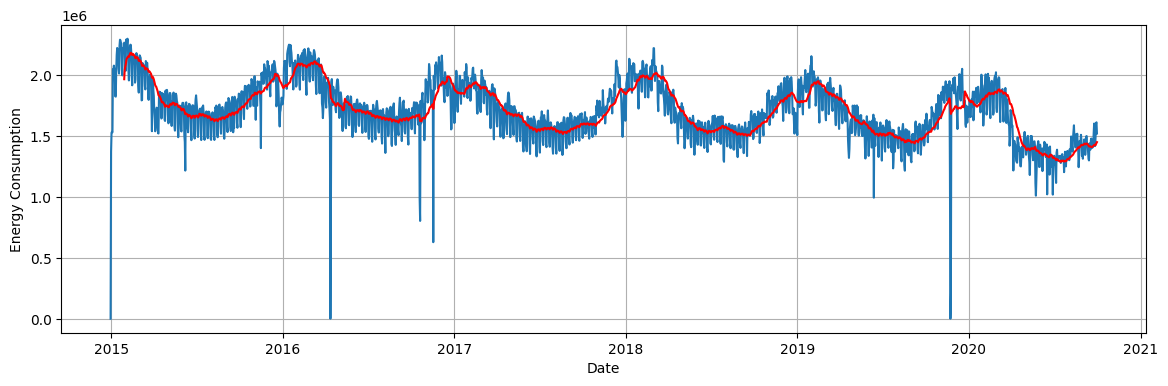

In [30]:
# Moyenne mobile (séparer signal et bruit)
# on lisse un peu
# on affiche sur le meme graphique
y = daily_energy['load']
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 4))
plt.plot(y)
plt.plot(y.rolling(30).mean(), color='red')
plt.grid(True)
plt.xlabel("Date")
plt.ylabel("Energy Consumption")
plt.show()

In [31]:
# la moyenne révèle la tendance sous-jacente
# elle justifie donc une introduction d'une feature trend

In [32]:
# saison hebdomadaire
daily_energy.groupby(daily_energy.index.dayofweek)['load'].mean()

,load
timestamp,
0,1.745882e+06
1,1.772211e+06
2,1.767346e+06
3,1.768770e+06
4,1.753301e+06
5,1.609506e+06
6,1.575636e+06


<Axes: xlabel='timestamp'>

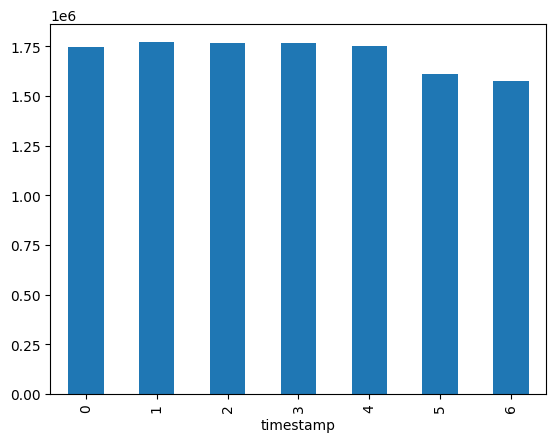

In [33]:
daily_energy.groupby(daily_energy.index.dayofweek)['load'].mean().plot(kind='bar')


<Axes: xlabel='timestamp'>

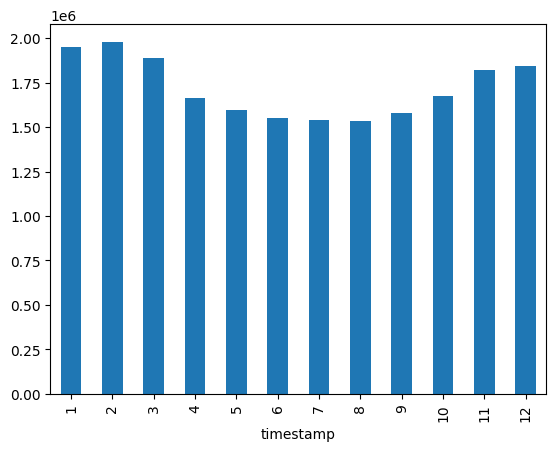

In [34]:
# saison annuelle
daily_energy.groupby(daily_energy.index.month)['load'].mean().plot(kind='bar')


<Axes: xlabel='timestamp'>

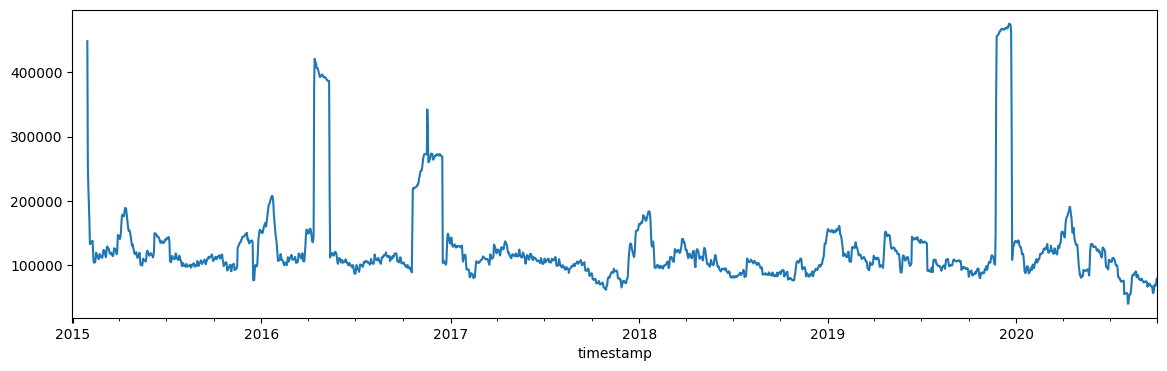

In [35]:
# variance dans le temps
daily_energy['load'].rolling(30).std().plot(figsize=(14, 4))

In [36]:
# variance plutot constante mais avex trois pics tres grand

In [37]:
# plusieurs chutes brutales

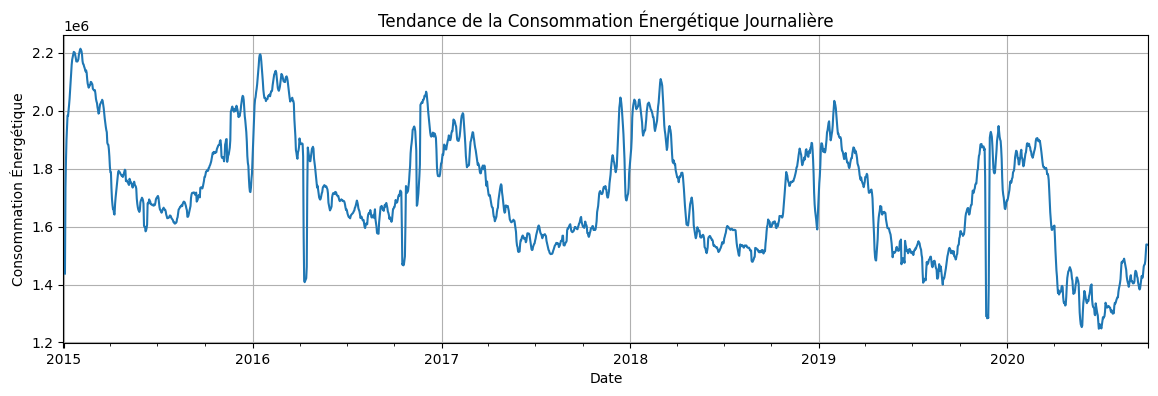

In [38]:
# Observons la tendance
import statsmodels.api as sm

decomposition = sm.tsa.seasonal_decompose(daily_energy['load'], model='additive')
fig = decomposition.trend.plot(figsize=(14, 4))
fig.set_title('Tendance de la Consommation Énergétique Journalière')
fig.set_xlabel('Date')
fig.set_ylabel('Consommation Énergétique')
plt.grid(True)
plt.show()

In [39]:
# la tendance de daily_energy est globalement décroissante, pas de rupture(en forme de haut bas, haut, bas)

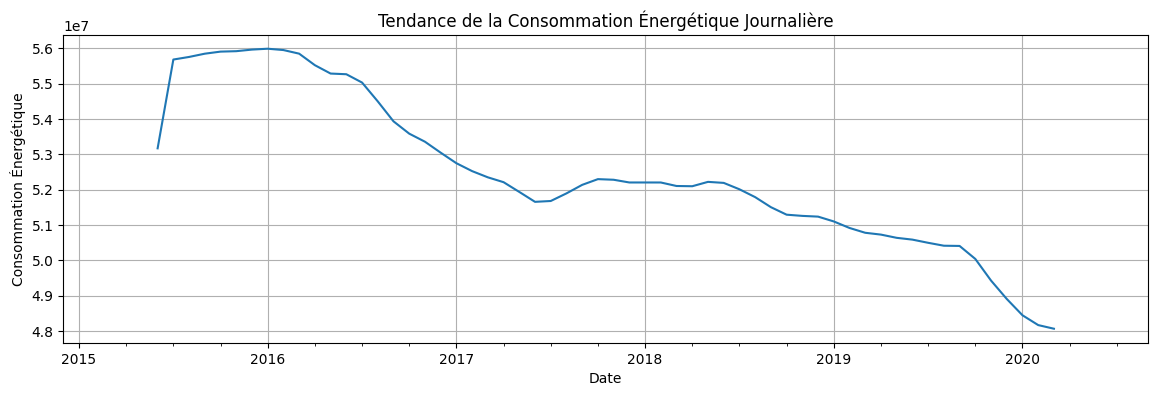

In [40]:
# Observons la tendance
import statsmodels.api as sm

decomposition = sm.tsa.seasonal_decompose(monthly_energy['load'], model='additive')
fig = decomposition.trend.plot(figsize=(14, 4))
fig.set_title('Tendance de la Consommation Énergétique Journalière')
fig.set_xlabel('Date')
fig.set_ylabel('Consommation Énergétique')
plt.grid(True)
plt.show()

In [41]:
# la tendance de montly_energy est globalement décroissante, pas de rupture

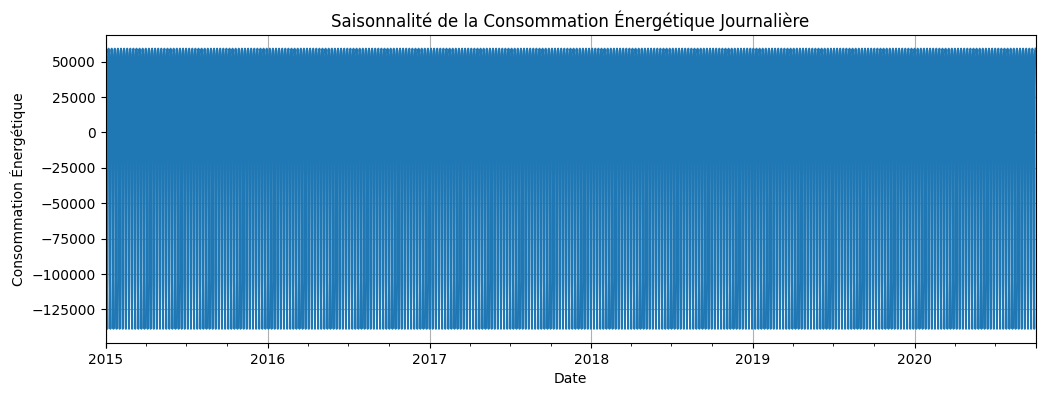

In [42]:
# Saisonnalité
import statsmodels.api as sm

decomposition = sm.tsa.seasonal_decompose(daily_energy['load'], model='additive')
fig = decomposition.seasonal.plot(figsize=(12,4))
fig.set_title('Saisonnalité de la Consommation Énergétique Journalière')
fig.set_xlabel('Date')
fig.set_ylabel('Consommation Énergétique')
plt.grid(True)
plt.show()

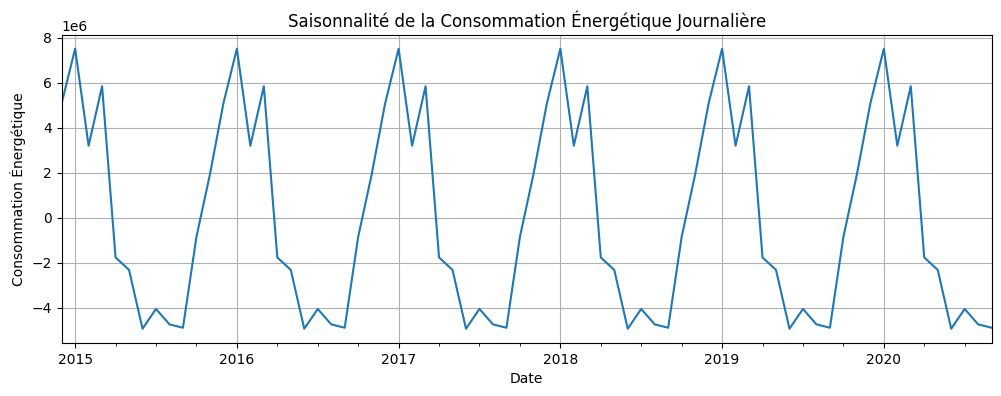

In [43]:
# Saisonnalité
import statsmodels.api as sm

decomposition = sm.tsa.seasonal_decompose(monthly_energy['load'], model='additive')
fig = decomposition.seasonal.plot(figsize=(12,4))
fig.set_title('Saisonnalité de la Consommation Énergétique Journalière')
fig.set_xlabel('Date')
fig.set_ylabel('Consommation Énergétique')
plt.grid(True)
plt.show()

In [44]:
# saisonnalié constante pour les deux, daily_energy et monthly_energy

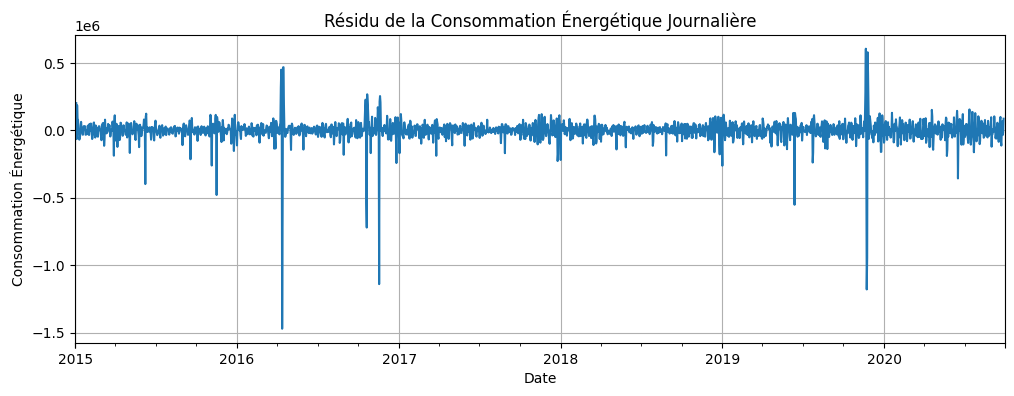

In [45]:
# Résidu
import statsmodels.api as sm

decomposition = sm.tsa.seasonal_decompose(daily_energy['load'], model='additive')
fig = decomposition.resid.plot(figsize=(12,4))
fig.set_title('Résidu de la Consommation Énergétique Journalière')
fig.set_xlabel('Date')
fig.set_ylabel('Consommation Énergétique')
plt.grid(True)
plt.show()


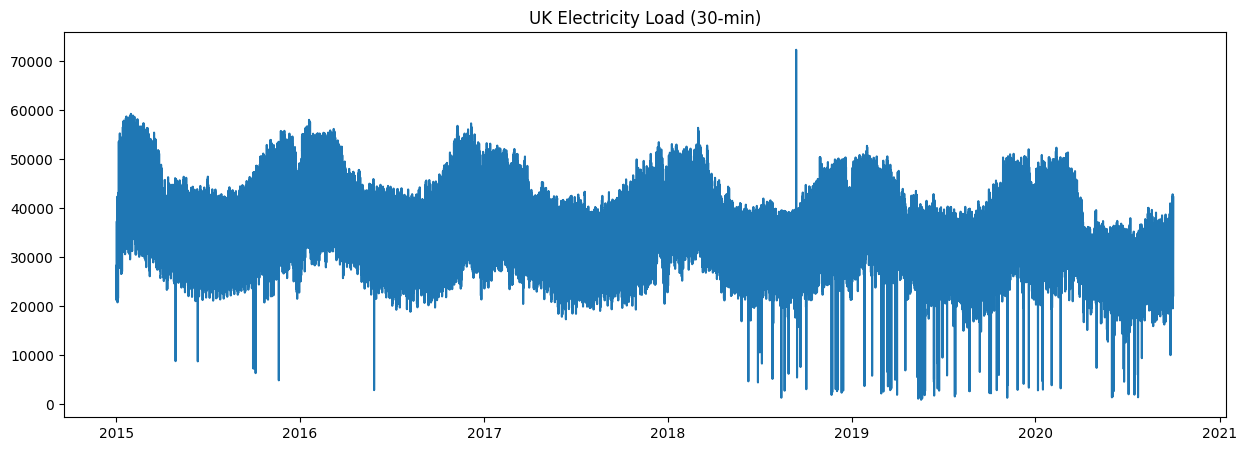

In [46]:
# serie globale
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
plt.plot(UKM_df_complete['load'])
plt.title("UK Electricity Load (30-min)")
plt.show()


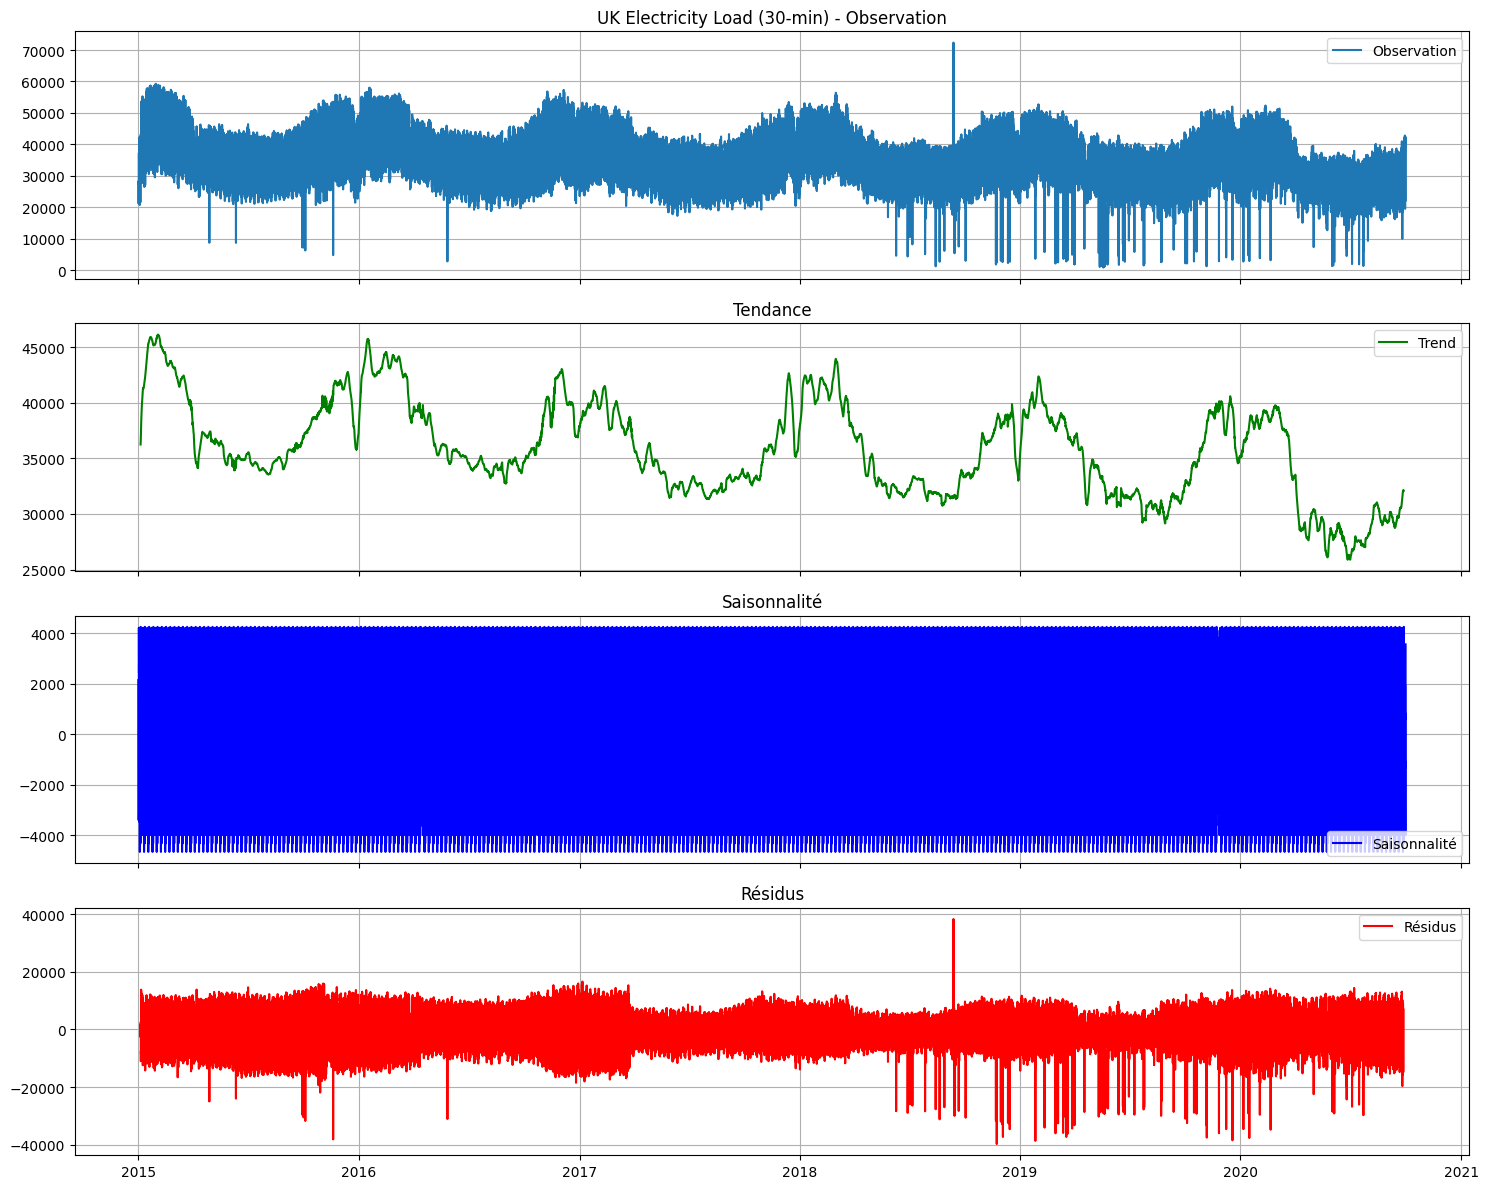

In [47]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Perform seasonal decomposition
decomp = seasonal_decompose(
    UKM_df_complete['load'].dropna(), # retrait des valeurs manquantes
    model="additive",
    period=336
)

# Extract components
trend = decomp.trend
seasonal = decomp.seasonal
residual = decomp.resid

# Create subplots for individual components
fig, axes = plt.subplots(4, 1, figsize=(15, 12), sharex=True)

# Plot original series
axes[0].plot(UKM_df_complete['load'].dropna(), label="Observation")
axes[0].set_title("UK Electricity Load (30-min) - Observation")
axes[0].legend()
axes[0].grid(True)

# Plot trend component
axes[1].plot(trend, label="Trend", color="green")
axes[1].set_title("Tendance")
axes[1].legend()
axes[1].grid(True)

# Plot seasonal component
axes[2].plot(seasonal, label="Saisonnalité", color="blue")
axes[2].set_title("Saisonnalité")
axes[2].legend()
axes[2].grid(True)

# Plot residual component
axes[3].plot(residual, label="Résidus", color="red")
axes[3].set_title("Résidus")
axes[3].legend()
axes[3].grid(True)

plt.tight_layout()
plt.show()

In [48]:
# Test de stationnarité
from statsmodels.tsa.stattools import adfuller

result = adfuller(UKM_df_complete['load'].dropna())

print("ADF statistic:", result[0])
print("p-value:", result[1])


ADF statistic: -13.788210145239594
p-value: 9.028483856935e-26


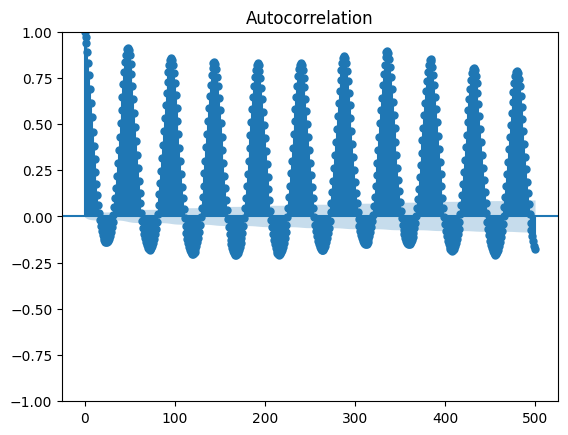

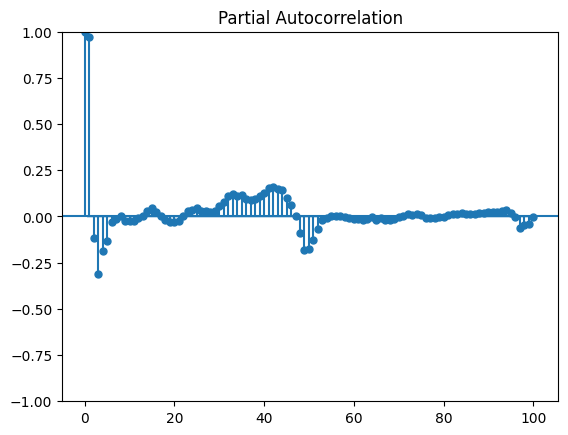

In [49]:
# Autocooélation
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(UKM_df_complete['load'].dropna(), lags=500)
plt.show()

plot_pacf(UKM_df_complete['load'].dropna(), lags=100)
plt.show()


#### La structure persiste dans les lags, l'oscillations est tres régulières donc la mémoire temporelle est forte

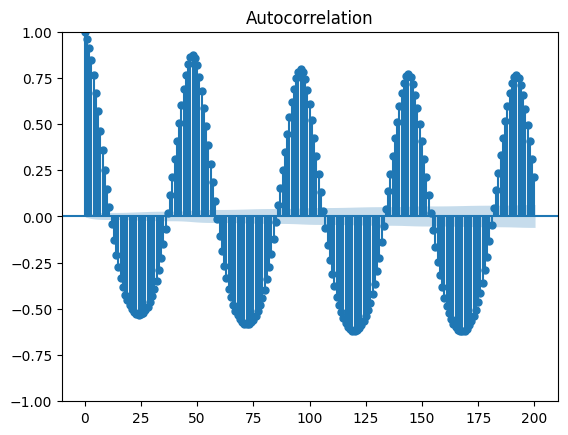

In [50]:
resid = decomp.resid.dropna()

plot_acf(resid, lags=200)
plt.show()


In [51]:
'''
la série présente une forte saisonnalité journalière et hebdomadaire

la dynamique est hautement auto-corrélée

la tendance est lente et continue

les anomalies sont localisées dans le résidu

un ML interprétable basé sur le passé est justifié
'''

'\nla série présente une forte saisonnalité journalière et hebdomadaire\n\nla dynamique est hautement auto-corrélée\n\nla tendance est lente et continue\n\nles anomalies sont localisées dans le résidu\n\nun ML interprétable basé sur le passé est justifié\n'

#### Définir le problème de forecasting

* Horizon : 7 jours (multi-step)

* Stratégie : sliding window

* Objectif : planification + base anomalies

In [52]:
# Baseline naïve saisonnière
de= daily_energy.dropna()
naive_seasonal = daily_energy.shift(7)
nv = naive_seasonal.dropna()

In [53]:
nv.isna().sum()

,0
load,0
day,0


In [54]:
# On compare
common = de.index.intersection(nv.index)

y_true = daily_energy.loc[common]
y_pred = naive_seasonal.loc[common]

In [55]:
y_pred.isna().sum()

,0
load,0
day,0


In [56]:
# Evaluation
from sklearn.metrics import mean_absolute_error

# Drop NaN values from both y_true and y_pred before calculating MAE
#valid_indices = y_true['load'].dropna().index.intersection(y_pred['load'].dropna().index)

mae_naive = mean_absolute_error(y_true['load'], y_pred['load'])
mae_naive

84748.85682903533

#### C'est la valeur maximale pour l'erreur

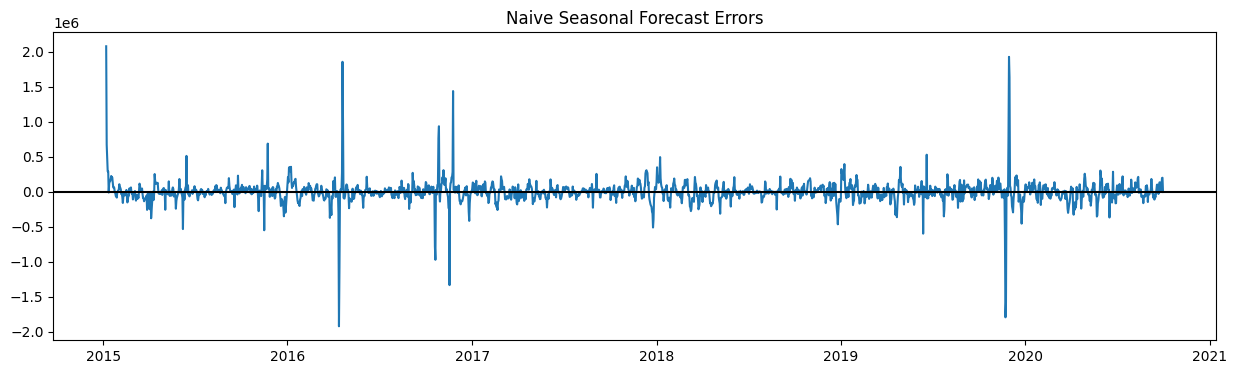

In [57]:
errors = y_true['load'] - y_pred['load']

plt.figure(figsize=(15,4))
plt.plot(errors)
plt.axhline(0, color="black")
plt.title("Naive Seasonal Forecast Errors")
plt.show()


#### Construire des features ML interprétables

In [58]:
# creer des variables calendrier
df_daily = daily_energy.copy()
df_daily.rename(columns={'load': 'y'}, inplace=True)

df_daily["dayofweek"] = df_daily.index.dayofweek # 0 = lundi

df_daily["is_weekend"] = df_daily.index.dayofweek.isin([5, 6])

df_daily["dayofyear"] = df_daily.index.dayofyear

In [59]:
# Lags
lags = [1,7,14,28]

for lag in lags:
    df_daily[f"lag_{lag}"] = df_daily["y"].shift(lag)

In [60]:
df_daily["rolling_7_mean"]  = df_daily["y"].rolling(7).mean()
df_daily["rolling_14_mean"] = df_daily["y"].rolling(14).mean()
df_daily["rolling_7_std"]   = df_daily["y"].rolling(7).std()


In [61]:
# Split temporel
split_date = "2019-01-01"

train = df_daily[df_daily.index < split_date]
test = df_daily[df_daily.index >= split_date]

In [62]:
# Drop NaNs from the combined train/test dataframes before splitting X and y
# This ensures X_train and y_train have consistent lengths
train_cleaned = train.dropna()
test_cleaned = test.dropna()

X_train = train_cleaned.drop(columns=["y", "day"])
y_train = train_cleaned["y"]

X_test = test_cleaned.drop(columns=["y", "day"])
y_test = test_cleaned["y"]

#### Modèle ML interprétable

##### Régression Ridge

In [63]:
from sklearn.linear_model import Ridge

model = Ridge(alpha = 1.0)
model.fit(X_train, y_train)

Ridge()

In [64]:
y_pred = model.predict(X_test)

In [65]:
from sklearn.metrics import mean_absolute_error

mae_ml = mean_absolute_error(y_test, y_pred)
mae_ml


57553.94483025714

In [66]:
print("MAE naive seasonal:", mae_naive)
print("MAE ML model:", mae_ml)


MAE naive seasonal: 84748.85682903533
MAE ML model: 57553.94483025714


#### Interprétation des coefficients

In [67]:
coef = pd.Series(model.coef_, index=X_train.columns)
coef.sort_values(key=abs, ascending=False)


,0
is_weekend,-117034.513906
dayofweek,-10149.279804
dayofyear,11.475702
rolling_7_mean,0.809138
lag_1,0.297059
rolling_14_mean,-0.161574
rolling_7_std,0.088057
lag_28,0.034549
lag_14,0.011290
lag_7,-0.010548


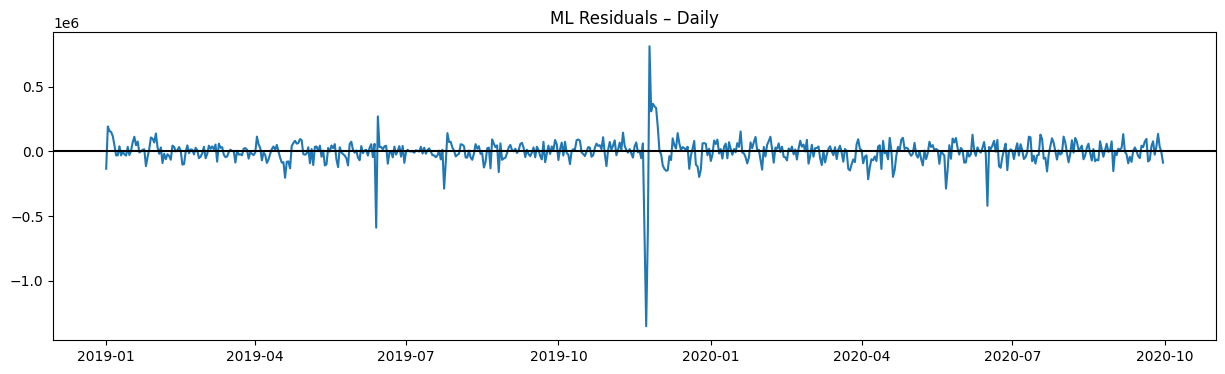

In [68]:
residuals = y_test - y_pred

plt.figure(figsize=(15,4))
plt.plot(residuals)
plt.axhline(0, color="black")
plt.title("ML Residuals – Daily")
plt.show()


#### prévoir 7 jours d’un coup

##### STRATÉGIE A — Récursive

In [69]:
def recursive_forecast(model,last_row,horizon=7):
    preds = []
    current = last_row.copy()

    for _ in range(horizon):
        y_hat = model.predict(current.values.reshape(1, -1))[0]
        preds.append(y_hat)

        # mise à jour des features
        current["lag_1"] = y_hat
        current["rolling_7_mean"] = (
            current["rolling_7_mean"] * 6 + y_hat
        ) / 7

    return preds

##### STRATÉGIE B — Directe

In [70]:
import numpy as np

df_daily["dow_sin"] = np.sin(2 * np.pi * df_daily["dayofweek"] / 7)
df_daily["dow_cos"] = np.cos(2 * np.pi * df_daily["dayofweek"] / 7)


In [71]:
df_daily["weekofyear"] = df_daily.index.isocalendar().week.astype(int)


In [72]:
H = 7
df_direct = df_daily.copy()

for h in range(1, H+1):
    df_direct[f"y_t+{h}"] = df_direct["y"].shift(-h)

df_direct = df_direct.dropna()


In [73]:
# Entraînement
models = {}

for h in range(1, H+1):
    X = df_direct.drop(columns=["y", "day"] + [f"y_t+{i}" for i in range(1, H+1)])
    y_h = df_direct[f"y_t+{h}"]

    X_train = X[X.index < split_date]
    y_train = y_h[y_h.index < split_date]

    model_h = Ridge(alpha=1.0)
    model_h.fit(X_train, y_train)

    models[h] = model_h

In [74]:
# Prédiction
X_test = X[X.index >= split_date]

preds_direct = {
    h: models[h].predict(X_test)
    for h in models
}


In [75]:
# Évaluation horizon par horizon
from sklearn.metrics import mean_absolute_error

for h in range(1, H+1):
    y_true = df_direct.loc[X_test.index, f"y_t+{h}"]
    y_pred = preds_direct[h]

    print(f"Horizon {h} jours - MAE:", mean_absolute_error(y_true, y_pred))


Horizon 1 jours - MAE: 74204.88642746226
Horizon 2 jours - MAE: 73584.56203799504
Horizon 3 jours - MAE: 80584.14769311812
Horizon 4 jours - MAE: 82881.21286684774
Horizon 5 jours - MAE: 84312.41210265613
Horizon 6 jours - MAE: 85578.48930228813
Horizon 7 jours - MAE: 86800.54300305553


#### l’erreur augmente-t-elle seulement en moyenne, ou aussi en variance ?

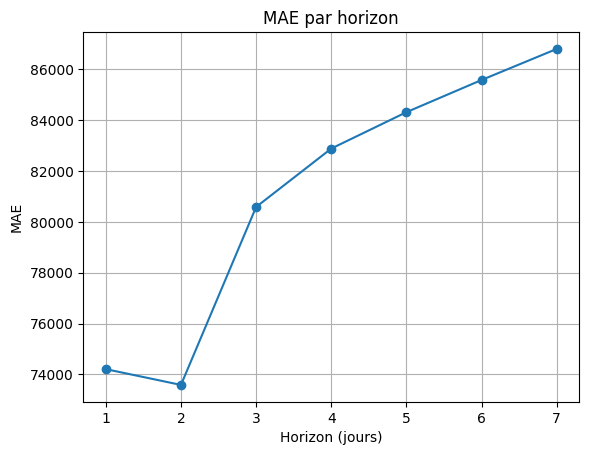

In [76]:
import matplotlib.pyplot as plt

mae_per_horizon = [
    74204.9, 73584.6, 80584.1, 82881.2,
    84312.4, 85578.5, 86800.5
]

plt.plot(range(1, 8), mae_per_horizon, marker="o")
plt.xlabel("Horizon (jours)")
plt.ylabel("MAE")
plt.title("MAE par horizon")
plt.grid(True)
plt.show()


In [77]:
# résidu centré
residuals = y_true - y_pred

print("Moyenne des résidus :", residuals.mean())


Moyenne des résidus : -18046.933012967602


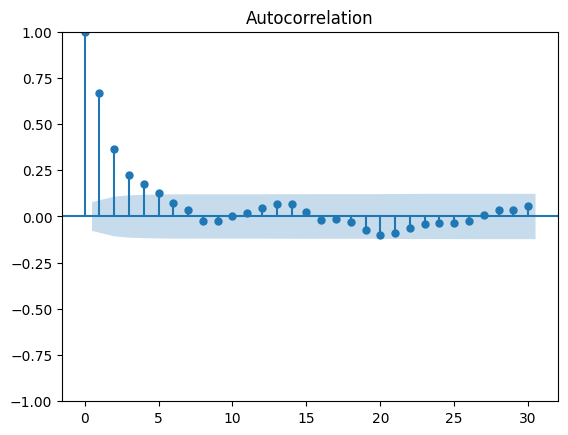

In [78]:
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt

plot_acf(residuals, lags=30)
plt.show()


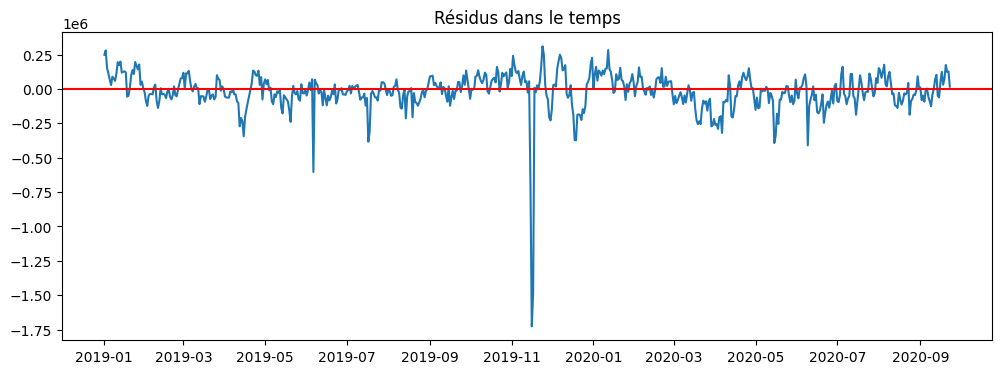

In [79]:
plt.figure(figsize=(12,4))
plt.plot(residuals)
plt.axhline(0, color='red')
plt.title("Résidus dans le temps")
plt.show()


<Axes: xlabel='y_t+7', ylabel='Count'>

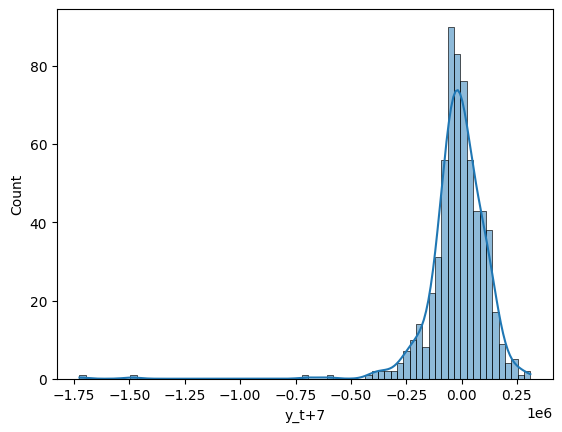

In [80]:
import seaborn as sns

sns.histplot(residuals, kde=True)


In [81]:
# Décomposition
from statsmodels.tsa.seasonal import STL

stl = STL(daily_energy['load'], period=7, robust=True)
res = stl.fit()

trend = res.trend
seasonal = res.seasonal
residual = res.resid


In [82]:
# Vérification
# 1. Stationnarité du résidu STL
from statsmodels.tsa.stattools import adfuller

adf_stat, p_value, *_ = adfuller(residual.dropna())
print("ADF p-value:", p_value)

# p<0.05 acceptable

ADF p-value: 0.0


In [83]:
# Nouveau modèle ML
df_ml = pd.DataFrame({
    "residual": residual,
    "lag_1": residual.shift(1),
    "lag_7": residual.shift(7),
    "lag_14": residual.shift(14),
    "rolling_7_mean": residual.rolling(7).mean(),
    "rolling_7_std": residual.rolling(7).std(),
    "is_weekend": residual.index.weekday >= 5,
    "dayofyear": residual.index.dayofyear
}).dropna()


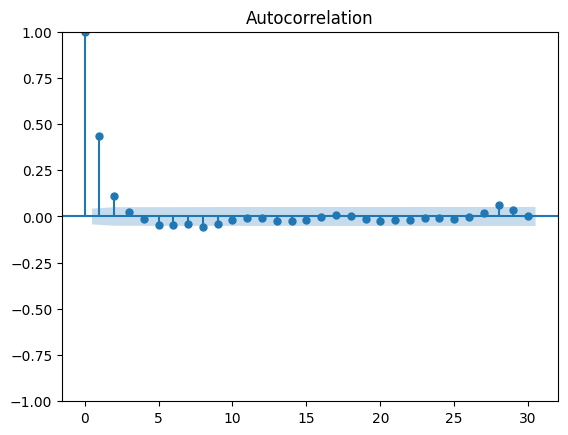

In [84]:
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt

plot_acf(residual, lags=30)
plt.show()


In [85]:
daily_energy.isna().sum()


,0
load,0
day,0


In [86]:
# Décomposition stl
from statsmodels.tsa.seasonal import STL

stl = STL(
    daily_energy['load'],
    period=7,
    robust=True
)

res = stl.fit()

trend = res.trend
seasonal = res.seasonal
residual = res.resid

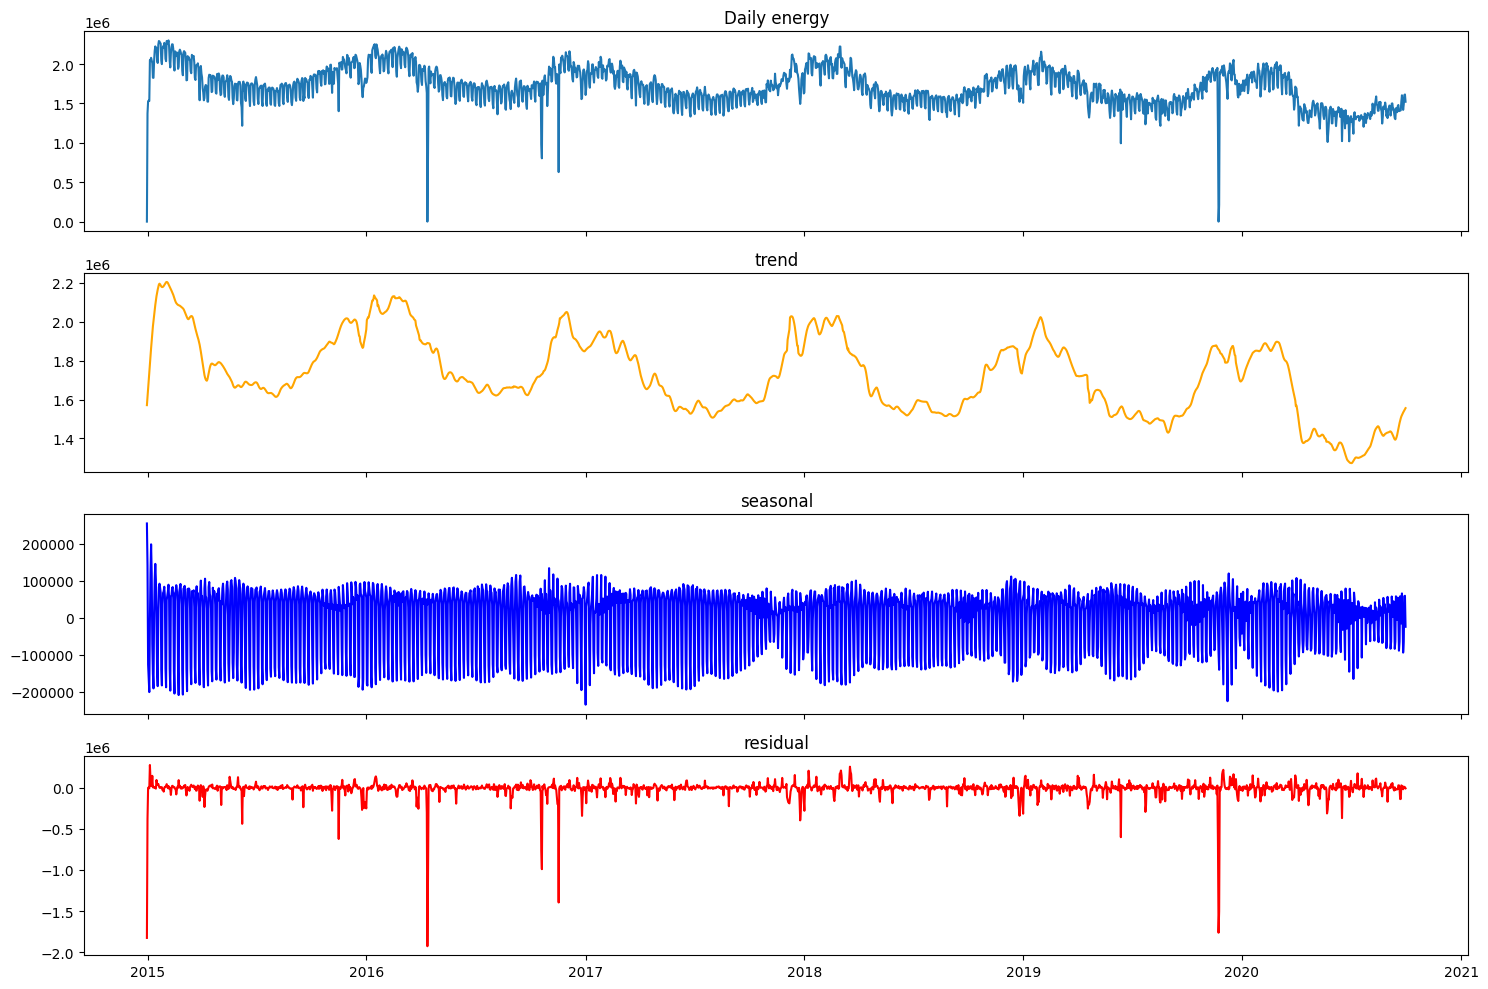

In [87]:
fig, axes = plt.subplots(4, 1, figsize=(15, 10), sharex=True)

axes[0].plot(daily_energy['load'], label="observed")
axes[0].set_title("Daily energy")

axes[1].plot(trend, label="trend", color="orange")
axes[1].set_title("trend")

axes[2].plot(seasonal, label="seasonal", color="blue")
axes[2].set_title("seasonal")

axes[3].plot(residual, label="residual", color="red")
axes[3].set_title("residual")

plt.tight_layout()
plt.show()

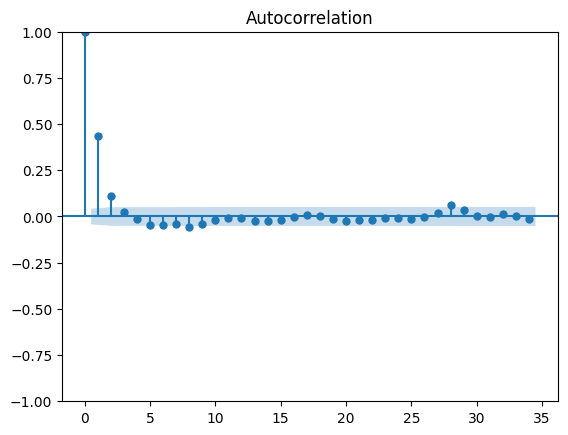

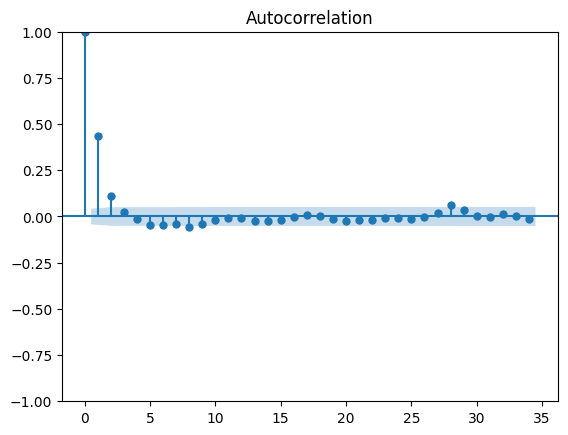

In [88]:
# vérifier l'autocorrelation du résidu
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(residual.dropna())

In [89]:
# Creation des horizons
horizon = [1,2,3,4,5,6,7]

for h in horizon:
    df_ml[f"y_h{h}"] = df_ml["residual"].shift(-h)

    df_ml = df_ml.dropna()

In [90]:
# split temporelle
split_date = "2019-01-01"

train = df_ml[df_ml.index < split_date]
test = df_ml[df_ml.index > split_date]


In [91]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error

features = [
    "lag_1", "lag_7", "lag_14",
    "rolling_7_mean", "rolling_7_std",
    "is_weekend", "dayofyear"
]

In [92]:
results = {}

for h in horizon:
    model = Ridge(alpha = 0.1)

    X_train = train[features]
    y_train = train[f"y_h{h}"]

    X_test = test[features]
    y_test = test[f"y_h{h}"]

    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    mae = mean_absolute_error(y_test, preds)
    results[h] = {
        "model": model,
        "mae": mae,
        "preds": preds
    }
    print(f"horizon {h} jours - MAE résidu: {mae: .0f}")

horizon 1 jours - MAE résidu:  46355
horizon 2 jours - MAE résidu:  45990
horizon 3 jours - MAE résidu:  45372
horizon 4 jours - MAE résidu:  45742
horizon 5 jours - MAE résidu:  46094
horizon 6 jours - MAE résidu:  46580
horizon 7 jours - MAE résidu:  46956


In [93]:
# reconstruction
final_prends = {}

for h in horizon:
    pred_resid = results[h]["preds"]
    trend_h = trend.loc[test.index].shift(h)
    seasonal_h = seasonal.loc[test.index].shift(h)

    final_prends[h] = pred_resid + trend_h + seasonal_h

In [94]:
for h in horizon:
    y_true_temp = daily_energy['load'].loc[test.index].shift(-h)
    y_pred_temp = final_prends[h]

    # Combine into a DataFrame to easily drop NaNs from both series simultaneously
    combined_df = pd.DataFrame({'y_true': y_true_temp, 'y_pred': y_pred_temp}).dropna()

    y_true = combined_df['y_true']
    y_pred = combined_df['y_pred']

    mae = mean_absolute_error(y_true, y_pred)

    print(f"horizon {h} jours - MAE final: {mae: .0f}")

horizon 1 jours - MAE final:  119332
horizon 2 jours - MAE final:  125477
horizon 3 jours - MAE final:  96547
horizon 4 jours - MAE final:  100612
horizon 5 jours - MAE final:  134686
horizon 6 jours - MAE final:  132741
horizon 7 jours - MAE final:  91441


In [95]:
window = 30
z_thresh = 3

resid_mean = residual.dropna().rolling(window).mean()
resid_std = residual.dropna().rolling(window).std()

z_scores = (residual - resid_mean) / resid_std

anomalies = z_scores.abs() > z_thresh

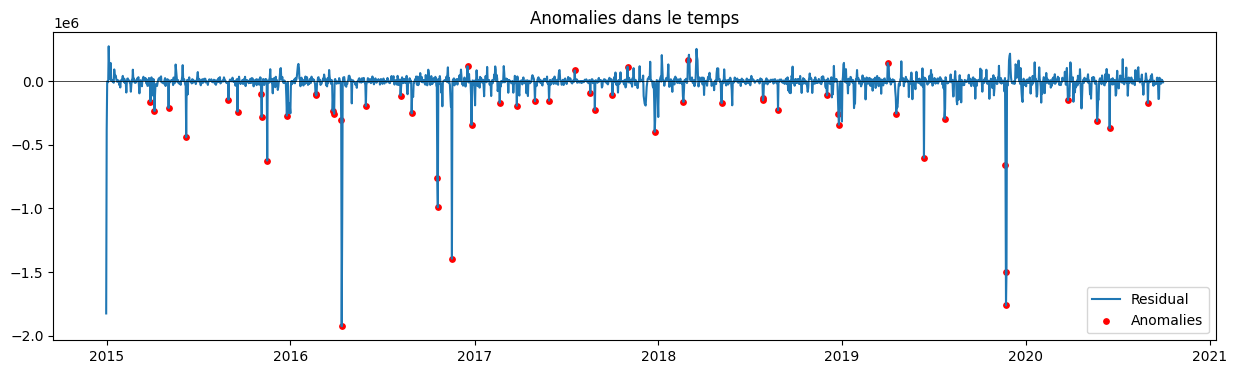

In [96]:
plt.figure(figsize=(15,4))
plt.plot(residual.dropna(), label="Residual")
plt.scatter(
    residual[anomalies].index,
    residual[anomalies],
    color="red",
    label="Anomalies",
    s = 15
)
plt.axhline(0, color="black", linewidth=0.5)
plt.legend()
plt.title("Anomalies dans le temps")
plt.show()

In [97]:
# fonction de prédiction journalière
def forecast_next_day(
        history_residual,
        history_features,
        models,
        horizons=range(1,8)
):
    preds = {}
    for h in horizon:
        X = history_features.iloc[-1:]
        preds[h] = models[h]["model"].predict(X)[0]
        return preds


In [98]:
# reconstruction
def reconstruct_forecast(
        date,
        pred_residuals,
        trend,
        seasonal
):
    final = {}
    for h, r in pred_residuals.items():
        final[h] = (
            trend.loc[date] + seasonal.loc[date] + r
        )
    return final

#### Dashboard

In [99]:
!pip install streamlit pyngrok


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 37.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 63.8 MB/s eta 0:00:00
  Attempting uninstall: cachetools
    Found existing installation: cachetools 7.0.0
    Uninstalling cachetools-7.0.0:
      Successfully uninstalled cachetools-7.0.0


In [100]:
%%writefile app.py

import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt

st.set_page_config(layout="wide")
st.title("UK Electricity Load Forecasting")

# ======================
# DATA LOADING
# ======================
@st.cache_data
def load_data():
    daily_energy = pd.read_pickle("daily_energy.pkl")
    trend = pd.read_pickle("trend.pkl")
    seasonal = pd.read_pickle("seasonal.pkl")
    residual = pd.read_pickle("residual.pkl")
    anomalies = pd.read_pickle("anomalies.pkl")
    final_preds = pd.read_pickle("final_preds.pkl")
    return daily_energy, trend, seasonal, residual, anomalies, final_preds

daily_energy, trend, seasonal, residual, anomalies, final_preds = load_data()

# ======================
# SIDEBAR
# ======================
st.sidebar.header("Controls")
horizon = st.sidebar.selectbox(
    "Forecast horizon (days)",
    options=sorted(final_preds.keys())
)

# ======================
# SECTION 1 – OBSERVED VS FORECAST
# ======================
st.subheader("Observed vs Forecast")

df_plot = pd.DataFrame({
    "Observed": daily_energy,
    "Forecast": final_preds[horizon]
}).dropna()

st.line_chart(df_plot.tail(365))

# ======================
# SECTION 2 – STL COMPONENTS
# ======================
st.subheader("STL Decomposition")

fig, ax = plt.subplots(3, 1, figsize=(12, 8), sharex=True)
ax[0].plot(trend, label="Trend", color="orange")
ax[1].plot(seasonal, label="Seasonal", color="green")
ax[2].plot(residual, label="Residual", color="red")

ax[0].set_title("Trend")
ax[1].set_title("Seasonal")
ax[2].set_title("Residual")

plt.tight_layout()
st.pyplot(fig)

# ======================
# SECTION 3 – ANOMALIES
# ======================
st.subheader("Detected anomalies (Residual-based)")

fig2, ax2 = plt.subplots(figsize=(12,4))
ax2.plot(residual, label="Residual")
ax2.scatter(
    residual[anomalies].index,
    residual[anomalies],
    color="red",
    s=10,
    label="Anomaly"
)
ax2.axhline(0, color="black", linewidth=0.5)
ax2.legend()
st.pyplot(fig2)

# ======================
# SECTION 4 – METRICS
# ======================
st.subheader("Model performance")

st.write("MAE increases with horizon, consistent with uncertainty propagation.")

Writing app.py


In [101]:
from pyngrok import ngrok
from google.colab import userdata

# Terminate open tunnels if any exist
ngrok.kill()

# Set your ngrok authtoken from Colab secrets
NGROK_AUTH_TOKEN = "2zyW3NcBgBEC5qLnoWc9cYSlnXe_QnZTTwKyyenzTfNiNhCK" # Assuming your secret is named 'NGROK_AUTH_TOKEN'
ngrok.set_auth_token(NGROK_AUTH_TOKEN)

# Run Streamlit in the background
# !streamlit run app.py &

# Open a tunnel to the Streamlit port 8501
public_url = ngrok.connect(addr='8501', proto='http')

print(f"Streamlit App URL: {public_url}")

!streamlit run app.py --server.port 8501

Streamlit App URL: NgrokTunnel: "https://45a6-35-193-54-222.ngrok-free.app" -> "http://localhost:8501"



  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://35.193.54.222:8501



  Stopping...


In [102]:
import pandas as pd
import joblib

# Save daily_energy to CSV
daily_energy.to_csv('daily_energy.csv', index=True)
print("daily_energy exported to daily_energy.csv")

# Save the dictionary of trained Ridge models
joblib.dump(results, 'ridge_models.joblib')
print("Trained Ridge models exported to ridge_models.joblib")

# Save components for Streamlit app
trend.to_pickle('trend.pkl')
seasonal.to_pickle('seasonal.pkl')
residual.to_pickle('residual.pkl')
anomalies.to_pickle('anomalies.pkl')

# Convert final_prends dictionary to a serializable format if needed, or save directly
# For simplicity, if final_prends contains pandas Series, it can be pickled directly.
# If it contains more complex objects not easily pickled, further processing might be needed.
# Given the current structure, direct pickling should work.
joblib.dump(final_prends, 'final_preds.pkl')

print("Trend, seasonal, residual, anomalies, and final predictions exported to .pkl files for Streamlit")

daily_energy exported to daily_energy.csv
Trained Ridge models exported to ridge_models.joblib
Trend, seasonal, residual, anomalies, and final predictions exported to .pkl files for Streamlit
